# The Movie Lens data set recommendation system project 

## Exploratory data analysis and visualizations

In [4]:
import pandas as pd 

In [5]:
#Read csv file locally 
df_links=pd.read_csv('links.csv')

In [6]:
#Returning the first 5 rows of the dataset
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Note: Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

In [7]:
df_movies=pd.read_csv('movies.csv')

In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
df_ratings=pd.read_csv('ratings.csv')

In [9]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
df_ratings.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [11]:
df_tags=pd.read_csv('tags.csv')

In [66]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
df_users

In [12]:
#Merging df_movies and df_ratings in an outter way on the 'movieId'
df=df_ratings.merge(df_movies,on='movieId')

In [15]:
#Checking the non null values 
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [161]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [90]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [16]:
df.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

Note: We can tell that the average rating is 3.52 and the max is 5. We also see that the dataset has 100003 records.

In [ ]:
#We want to creat a dataframe that contain the average of ratings of each movie

In [17]:
rating=pd.Series(df.groupby('title')['rating'].mean())

In [18]:
rating.sort_values()

title
Rust and Bone (De rouille et d'os) (2012)        0.5
The Emoji Movie (2017)                           0.5
The Butterfly Effect 3: Revelations (2009)       0.5
Follow Me, Boys! (1966)                          0.5
The Beast of Hollow Mountain (1956)              0.5
                                                ... 
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre II (1990)                5.0
My Love (2006)                                   5.0
Winter in Prostokvashino (1984)                  5.0
Karlson Returns (1970)                           5.0
Name: rating, Length: 9719, dtype: float64

In [22]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.columns=['rating_avg']

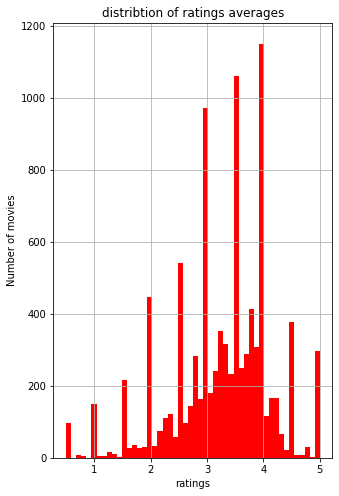

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating_avg'].hist(bins=50, figsize=(5,8), color='red')
plt.ylabel('Number of movies')
plt.xlabel('ratings')
plt.title('distribtion of ratings averages')
plt.show()

In [ ]:
#We can see that most of the movies are rated between 2.5 and 4. Next let’s visualize the number_of_ratings column in similar manner.

In [27]:
ratings['number_of_ratings']=df.groupby('title')['rating'].count()
ratings['number_of_ratings']

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: number_of_ratings, Length: 9719, dtype: int64

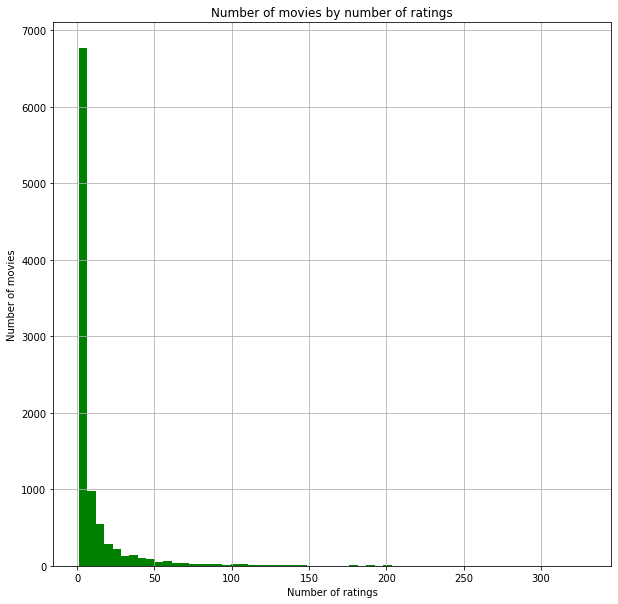

In [28]:
ratings['number_of_ratings'].hist(bins=60,figsize=(10,10),color='green')
plt.ylabel('Number of movies')
plt.xlabel('Number of ratings')
plt.title('Number of movies by number of ratings')
plt.show()


In [33]:
''''From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous.
Let’s now check the relationship between the rating of a movie and the number of ratings. We do this by plotting a scatter plot using seaborn. Seaborn enables us to do this using the jointplot() function.'''

"'From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous.\nLet’s now check the relationship between the rating of a movie and the number of ratings. We do this by plotting a scatter plot using seaborn. Seaborn enables us to do this using the jointplot() function."

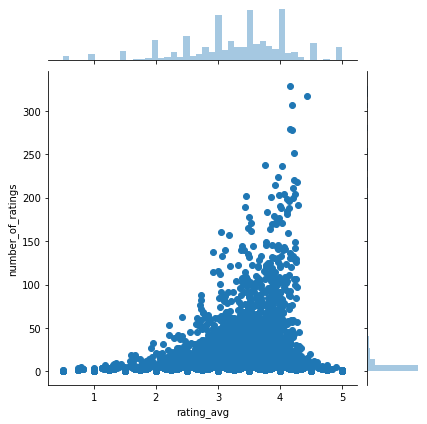

In [40]:
import seaborn as sns
sns.jointplot(x='rating_avg', y='number_of_ratings', data=ratings)

In [ ]:
#From the diagram we can see that their is a positive relationship between the average rating of a movie and the number of ratings. 

In [226]:
ratings.head()

,rating_avg,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Note:This is important so that we can see the relationship between the average rating of a movie and the number of ratings the movie got. It is very possible that a 5 star movie was rated by just one person.It iss therefore statistically incorrect to classify that movie has a 5 star movie. We will therefore need to set a threshold for the minimum number of ratings as we build the recommender system

In [41]:
ratings.number_of_ratings.value_counts()

1      3441
2      1298
3       800
4       529
5       383
       ... 
203       1
211       1
251       1
215       1
307       1
Name: number_of_ratings, Length: 177, dtype: int64

In [162]:
df.userId.value_counts

<bound method IndexOpsMixin.value_counts of 0           1
1           5
2           7
3          15
4          17
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64>

## Memory v. Model-Based Collaborative Filtering Approaches

'''''''To make a collaborative recommendation system we need to make a utiliy Matrix that has Users in rows and movies in rows and the values are the rating of each movie by each user. Then we can apply a sigular vector decomposition'''''''

In [49]:
Utility_Matrix=df.pivot_table(index='userId',columns='title',values='rating',fill_value=0)

In [50]:
Utility_Matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.0,0
2,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
607,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
608,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,4.5,3.5,0.0,0.0,0


In [ ]:
#SVD in Python
#SciPy has a straightforward implementation of SVD to help us avoid all the complex steps of SVD. We can use the svds() function to decompose a matrix 

In [60]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
# Apply SVD
u, s, vt = svds(Utility_Matrix, k=50) # k is the number of stretching factors

print ('A:\n',Utility_Matrix)
print ('=')
print ('\nU:\n', u)
print ('\nΣ:\n', s)
print ('\nV.T:\n', vt)

A:
 title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1                0                                        0   
2                0                                        0   
3                0                                        0   
4                0                                        0   
5                0                                        0   
...            ...                                      ...   
606              0                                        0   
607              0                                        0   
608              0                                        0   
609              0                                        0   
610              4                                        0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                    0   
2          

In [261]:
import numpy as np
print('Approximation of Ratings Matrix')
u.dot(np.diag(s).dot(vt))

Approximation of Ratings Matrix


array([[-6.92873637e-02,  1.87668108e-02, -4.28949139e-02, ...,
        -1.87782264e-01,  1.50037535e+00,  3.34632090e-02],
       [-2.86782837e-02, -1.20149084e-02, -1.07852546e-02, ...,
        -1.02054894e-02,  5.66087362e-02, -3.67801466e-04],
       [ 1.74872101e-02,  1.23869158e-03,  4.90684906e-03, ...,
         8.86581055e-03,  5.27317419e-02,  3.76147903e-03],
       ...,
       [ 1.27096406e-03, -8.19546796e-02, -5.69910637e-02, ...,
         2.31730054e-02,  5.37805707e-01,  1.74674416e-02],
       [-2.22592510e-03,  5.34112987e-03,  5.61299748e-03, ...,
         2.47015214e-02,  2.31089246e-02, -3.79650636e-03],
       [ 3.87914228e+00, -2.45434938e-02, -2.53885265e-02, ...,
         1.42288530e+00, -2.58587981e-01,  9.69463724e-03]])

As you can see, the matrix has now been almost recreated to the exact specifications of the original matrix.

Memory v. Model-Based Collaborative Filtering Approaches:

Note: The memory-based algorithms generally should have all data in memory, whereas model-based can make fast predictions using less data than the original

Note: We need to convert pandas dataframe to surprise dataframe and yes, surprise dataframe must have three columns, user ids, item ids, and ratings in this order.

In [53]:
df_surprise=df.drop(['timestamp','title','genres'],axis=1)

In [55]:
df_surprise.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [57]:
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_surprise,reader)

In [58]:
!pip install scikit-surprise 
import surprise
from surprise import Dataset
from surprise.model_selection import train_test_split

In [59]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [291]:
# Split into train and test set
trainset, testset = train_test_split(data)

In [292]:
print('Type trainset :',type(trainset),'\n')
print('Type testset :',type(testset))
testset[0]

Type trainset : <class 'surprise.trainset.Trainset'> 

Type testset : <class 'list'>


(474, 1921, 4.0)

Memory-Based Methods (Neighborhood-Based)

In [293]:
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

for the puropose of computation time, wecalculate the similarity between whichever number is fewer, users or items. Let's see what the case is for our training set

In [294]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  610 

Number of items:  8968 



In [ ]:
it will be more efficient to calculate user-user similarity rather than item-item similarity.

In [269]:
cos_basic = knns.KNNBasic(sim_options={'name':'cosine', 'user_based':True})

cos_basic.fit(trainset)

predictions = Knn_basic.test(testset)

In [274]:
accuracy.rmse(predictions)

RMSE: 0.9739


0.9738502492804821

In [275]:
pearson_basic = knns.KNNBasic(sim_options={'name':'pearson', 'user_based':True})

pearson_basic.fit(trainset)

predictions_pearson = pearson_basic.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [277]:
accuracy.rmse(predictions_pearson)

RMSE: 0.9746


0.974642215252446

In [280]:
knn_baseline = knns.KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
knn_baseline.fit(trainset)
predictions_bl = knn_baseline.test(testset)
print(accuracy.rmse(predictions_bl))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8769
0.8768536306471256


Model-based filtering

In [310]:
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8959
0.8958916757764341


In [287]:
svd.predict('610','160341')

Prediction(uid='610', iid='160341', r_ui=None, est=3.503694153815639, details={'was_impossible': False})

In [311]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[50, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
               'reg_all': [0.5, 0.6]}
gridsearch_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gridsearch_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


In [312]:
print(gridsearch_model.best_score)
print(gridsearch_model.best_params)

{'rmse': 0.8952033524159635, 'mae': 0.6938351606255365}
{'rmse': {'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.5}, 'mae': {'n_factors': 50, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.5}}


In [177]:
df_surprise

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100831,610,160341,2.5
100832,610,160527,4.5
100833,610,160836,3.0
100834,610,163937,3.5


 The basic idea behind collaborative filtering model is:

Predict a numerical value expressing the predicted score of an item for a user. The predicted value should be within the same scale that is used by all users for the rating (i.e. the number of stars or rating between 0-5)

Recommend a list of Top-N items that the active user will like the most based on the highest predicted ratings for the items that they have not yet seen

In [ ]:
The function should present users with a movie and ask them to rate it

In [ ]:
create a more complete recommender system pipeline to obtain the top recommendations for a specific user.

In [ ]:
 to create a function that allows us to pick randomly selected movies. The function should present users with a movie and ask them to rate it. If they have not seen the movie, they should be able to skip rating it.

In [ ]:
def movie_rater(movie_df,rate,genre):
    